### Predictive statistics: class example 2, multiple linear regression

Multiple linear regression using scikit-learn is very easy. In fact, you have already seen everything you need to know in the previous class example notebook!

Let's set up the libraries that we'll use as before:

In [1]:
# import numpy to generate toy data, and matplotlib to plot it
import numpy as np
import matplotlib.pyplot as plt
# set up matplotlib to show the figures inline
plt.ion()
%matplotlib inline
# import the LinearRegression method from scikit-learn
from sklearn.linear_model import LinearRegression

We'll create some toy data again. This time, we'll use some non-linear functions, to illustrate that they can be used in a linear model without difficulty:

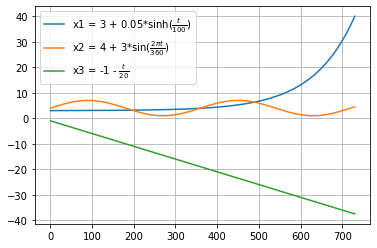

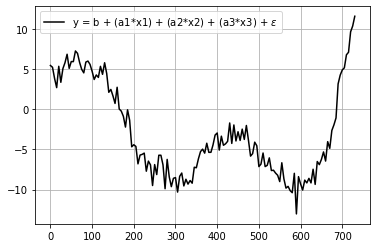

In [2]:
# create evenly-spaced "time" variable, covering 730 days, with 1 observation every 5 days
t = np.arange(0,731,5)
# define a non-linear trend
x1 = 3 + 0.05*np.sinh(t*1e-2)
# define a seasonal cycle
x2 = 4 + 3*np.sin(2*np.pi*t/360)
# define a linear trend
x3 = -1 - t/20

# plot the input functions:
plt.figure()
p0 = plt.plot(t,x1,label=r'x1 = 3 + 0.05*sinh($\frac{t}{100}$)')
p1 = plt.plot(t,x2,label=r'x2 = 4 + 3*sin($\frac{2\pi t}{360}$)')
p2 = plt.plot(t,x3,label=r'x3 = -1 - $\frac{t}{20}$')
plt.grid()
plt.legend()

# combine the three contributions and some noise to make our output data
a1 = 0.8
a2 = 1.5
a3 = 0.6
b = -4
epsilon = np.random.randn(len(t))
y = b + (a1*x1) + (a2*x2) + (a3*x3) + epsilon
plt.figure()
plt.plot(t,y,'k-',label=r'y = b + (a1*x1) + (a2*x2) + (a3*x3) + $\epsilon$')
plt.grid()
plt.legend()

Now let's set up the regression problem:

In [3]:
# 1: create the matrix X, combining our three input variables, x1, x2 and x3.
# Note that scikit-learn will add the column of ones for us automatically
# (unless we tell it not to by setting fit_intercept=False), and so we 
# just need to combine the three variables in X
X = np.vstack((x1,x2,x3)).T
print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))

# 2: create the model, as before
model = LinearRegression()

# 3: fit the model, as before
model.fit(X,y)

The shape of X is (147, 3)
The shape of y is (147,)


LinearRegression()

As before, we can look at the values of the coefficients chosen by the model:

In [4]:
print('Model coefficients for [a1, a2, a3]: {}'.format(model.coef_))
print('Model coefficient for b: {}'.format(model.intercept_))

Model coefficients for [a1, a2, a3]: [0.81603828 1.5018647  0.60416516]
Model coefficient for b: -3.9530650305250554


For comparison, the true values that we used when we created y earlier were:

```
a1 = 0.8
a2 = 1.5
a3 = 0.6
b = -4
```

We can also use the model to estimate values for y, again using the same method as before:

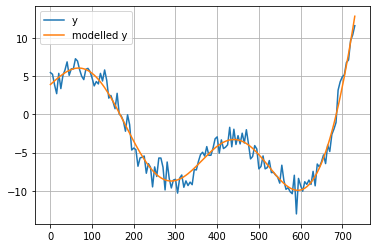

In [5]:
# 4: get predicted values for y, as before
y_hat = model.predict(X)

# 5: plot the real and modelled values
plt.figure()
plt.plot(t,y,label='y')
plt.plot(t,y_hat,label='modelled y')
plt.legend()
plt.grid()